In [1]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD
import os

Using TensorFlow backend.


In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [6]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [10]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=25, batch_size=100)

Train on 27455 samples, validate on 7172 samples
Epoch 1/25
27455/27455 [==============================] - 11s 406us/step - loss: 0.0483 - acc: 0.9846 - val_loss: 0.3161 - val_acc: 0.9154
Epoch 2/25
27455/27455 [==============================] - 11s 386us/step - loss: 0.0419 - acc: 0.9860 - val_loss: 0.3321 - val_acc: 0.9102
Epoch 3/25
27455/27455 [==============================] - 11s 396us/step - loss: 0.0438 - acc: 0.9851 - val_loss: 0.3714 - val_acc: 0.9045
Epoch 4/25
27455/27455 [==============================] - 10s 376us/step - loss: 0.0484 - acc: 0.9844 - val_loss: 0.3477 - val_acc: 0.9138
Epoch 5/25
27455/27455 [==============================] - 11s 386us/step - loss: 0.0414 - acc: 0.9862 - val_loss: 0.3434 - val_acc: 0.9087
Epoch 6/25
27455/27455 [==============================] - 11s 391us/step - loss: 0.0395 - acc: 0.9870 - val_loss: 0.3220 - val_acc: 0.9197
Epoch 7/25
27455/27455 [==============================] - 12s 427us/step - loss: 0.0393 - acc: 0.9876 - val_loss: 0.2

In [20]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 1s 166us/step
Accuracy:  0.9274958170663692


In [21]:
classifier.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 3, 3, 128)         2176      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
__________

In [22]:
classifier.save('CNNmodel.h5')

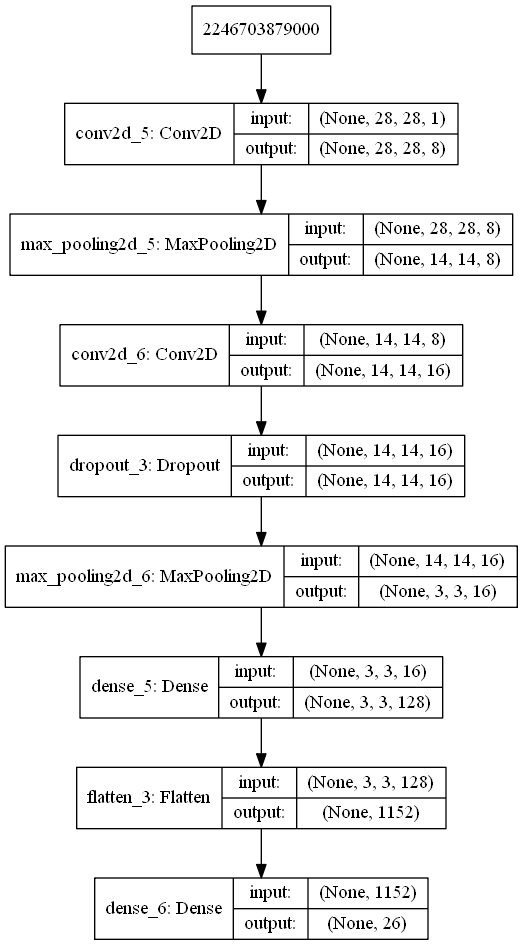

In [23]:
from keras.utils.vis_utils import plot_model

plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image

Image(retina=True, filename='model.png')

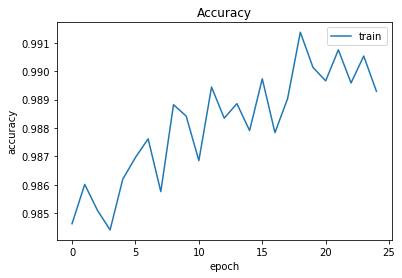

In [30]:
plt.plot(history.history['acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.savefig('plot.png')
plt.show()
